In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")
!pip install facenet-pytorch
# Clean up the notebook
clean_notebook()




Notebook cleaned.


In [2]:
# # Export the CUDA_VISIBLE_DEVICES environment variable
# import os

# output = !python3 /workspace/search_gpu.py --target 80

# os.environ["CUDA_VISIBLE_DEVICES"] = output[0]

# # Display the value of cuda_device
# print("CUDA device:", os.environ["CUDA_VISIBLE_DEVICES"] )

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "MIG-b1700e4f-1b5c-53c6-b75e-b52536ff7060"
# Display the value of cuda_device
print("CUDA device:", os.environ["CUDA_VISIBLE_DEVICES"] )

CUDA device: MIG-b1700e4f-1b5c-53c6-b75e-b52536ff7060


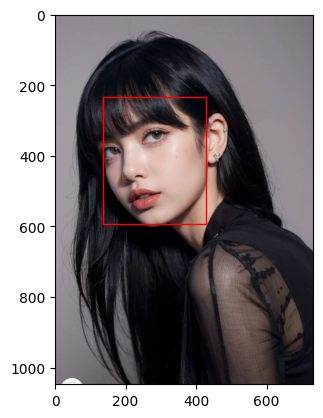

In [4]:
import torch
from facenet_pytorch import MTCNN
from PIL import Image
import matplotlib.pyplot as plt

# Initialize the MTCNN model
mtcnn = MTCNN(keep_all=True, device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))



# Load an image
image = Image.open(".././/images/lisa.jpg")

# Detect faces
boxes, _ = mtcnn.detect(image)

# Draw boxes on the image
fig, ax = plt.subplots()
ax.imshow(image)
if boxes is not None:
    for box in boxes:
        rect = plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, color='red')
        ax.add_patch(rect)

plt.show()


In [5]:
boxes

array([[136.75552368164062, 231.67660522460938, 428.602783203125,
        591.63818359375]], dtype=object)

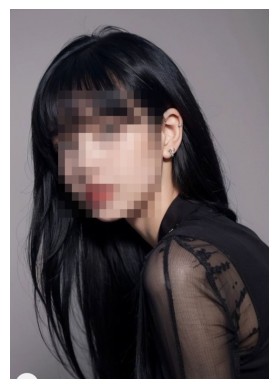

In [6]:
import torch
from facenet_pytorch import MTCNN
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def mosaic(img, bounds, pixelation_level=15):
    """
    Apply a mosaic (pixelation) effect to a bounded region of the image.

    Args:
    - img (PIL.Image): The original image.
    - bounds (tuple): The bounding box (x_min, y_min, x_max, y_max) for the face.
    - pixelation_level (int): The level of pixelation.

    Returns:
    - img (PIL.Image): The image with the mosaic effect applied.
    """
    x_min, y_min, x_max, y_max = bounds
    # Convert coordinates to integers
    x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])
    
    # Crop the region to apply mosaic
    cropped_img = img.crop((x_min, y_min, x_max, y_max))
    # Resize cropped region to pixelate
    cropped_img = cropped_img.resize((pixelation_level, pixelation_level), resample=Image.BILINEAR)
    # Scale back to original size
    cropped_img = cropped_img.resize((x_max - x_min, y_max - y_min), Image.NEAREST)
    # Paste the pixelated region back
    img.paste(cropped_img, (x_min, y_min, x_max, y_max))
    return img


# Initialize the MTCNN model
mtcnn = MTCNN(keep_all=True, device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu'))

# Load an image
image = Image.open(".././/images/lisa.jpg")

# Detect faces
boxes, _ = mtcnn.detect(image)

# Apply mosaic to detected faces
if boxes is not None:
    for box in boxes:
        image = mosaic(image, box)

# Show the result
plt.imshow(image)
plt.axis('off')
plt.show()
